# 앙상블 기법

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# UCI HAR 데이터셋의 특징 이름이 정의된 파일 URL
url = (
    "https://github.com/PinkWink/ML_tutorial/raw/refs/heads/master/"
    + "dataset/HAR_dataset/features.txt"
)

# 공백(여러 개)으로 구분된 텍스트 파일을 컬럼 인덱스/이름으로 읽어온다
feature_name_df = pd.read_csv(
    url,
    header=None,
    sep=r"\s+",                       # 정규식으로 공백 구분 → SyntaxWarning 방지 위해 r 접두 사용
    names=["column_index", "column_name"]
)

feature_name_df.head()                # 상위 몇 줄 확인

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [2]:
len(feature_name_df)                  # 총 특징 개수 (561)

561

In [3]:
feature_name = feature_name_df["column_name"].values.tolist()  # 특징 이름 리스트 생성
feature_name[:10]                    # 상위 10개 특징 이름 확인


['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [4]:
# === HAPT 데이터: 특징 행렬 로드 ===
X_train_url = (
    "https://github.com/PinkWink/ML_tutorial/raw/refs/heads/master/"
    "dataset/HAR_dataset/train/X_train.txt"
)
X_test_url = (
    "https://github.com/PinkWink/ML_tutorial/raw/refs/heads/master/"
    "dataset/HAR_dataset/test/X_test.txt"
)

# 공백 구분 텍스트를 읽어 특징값 DataFrame으로 변환
X_train = pd.read_csv(X_train_url, sep=r"\s+", header=None)
X_test = pd.read_csv(X_test_url, sep=r"\s+", header=None)

# 앞서 구한 feature_name 리스트를 컬럼명으로 부여 (561개 센서 특징)
X_train.columns = feature_name_df["column_name"]
X_test.columns = feature_name_df["column_name"]

X_train.head()      # 형태 확인

column_name,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [5]:
# === 레이블(y) 로드 ===
y_train_url = (
    "https://github.com/PinkWink/ML_tutorial/raw/refs/heads/master/"
    "dataset/HAR_dataset/train/y_train.txt"
)
y_test_url = (
    "https://github.com/PinkWink/ML_tutorial/raw/refs/heads/master/"
    "dataset/HAR_dataset/test/y_test.txt"
)

# 행동(action) 레이블을 읽어와 단일 컬럼 DataFrame으로 저장
y_train = pd.read_csv(y_train_url, sep=r"\s+", header=None, names=["action"])
y_test = pd.read_csv(y_test_url, sep=r"\s+", header=None, names=["action"])

# 학습/검증 데이터 크기 확인 → (샘플 수, 특징 수)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# ((7352, 561), (2947, 561), (7352, 1), (2947, 1))

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

In [6]:
y_train["action"].value_counts()  # 학습 데이터 내 행동 레이블 분포 확인

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64

### 결정나무

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# 기본 결정트리 모델 정의 후 학습/평가
dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
dt_clf.fit(X_train, y_train)                 # 훈련 데이터로 트리 학습
pred = dt_clf.predict(X_test)                # 테스트 세트 예측
accuracy_score(y_test, pred)                 # 정확도 0.81 정도


0.8096369189005769

### max_depth를 다양하게 하기 위해 GridSearchCV 이용

In [8]:

# --- 하이퍼파라미터 탐색: 최대 깊이 후보를 GridSearchCV로 평가 ---
params = {"max_depth": [6, 8, 10, 12, 16, 20, 24]}

grid_cv = GridSearchCV(
    dt_clf,                   # 위에서 만든 결정트리 기본 설정
    param_grid=params,        # 시험할 max_depth 목록
    scoring="accuracy",       # 검증 점수 지표
    cv=5,                     # 5-fold 교차검증
    return_train_score=True   # 훈련 점수도 함께 저장
)

grid_cv.fit(X_train, y_train)  # 모든 조합을 학습/평가 -> best_estimator_ 확인 가능

,estimator,DecisionTreeC...ndom_state=13)
,param_grid,"{'max_depth': [6, 8, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,criterion,'gini'


In [9]:
grid_cv.best_params_            # 최적 하이퍼파라미터 {'max_depth': 00}

{'max_depth': 8}

In [10]:

grid_cv.best_score_             # 최고 교차검증 점수 0.855 정도

np.float64(0.8541974777674495)

In [11]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)  # cv 결과를 DataFrame으로 변환
cv_results_df[['param_max_depth', 'mean_test_score']]  # max_depth별 평균 테스트 점수 확인

,param_max_depth,mean_test_score
0,6,0.843444
1,8,0.854197
2,10,0.847125
3,12,0.842503
4,16,0.839510
5,20,0.840597
6,24,0.839781


### 노드별 depth와 각 depth에서 사용된 feature들 얻기

In [12]:
import numpy as np
from collections import defaultdict

# dt_clf: 이미 fit된 DecisionTreeClassifier
# feature_names: 컬럼 이름 리스트 (예: list(X.columns) 또는 iris.feature_names)

tree_ = dt_clf.tree_
n_nodes = tree_.node_count
children_left = tree_.children_left
children_right = tree_.children_right
features = tree_.feature  # 각 노드에서 사용한 feature 인덱스, leaf는 -2 또는 -1

# 노드 깊이 계산 (BFS)
node_depth = np.zeros(shape=n_nodes, dtype=int)
stack = [(0, 0)]  # (node_id, depth)
while stack:
    node_id, depth = stack.pop()
    node_depth[node_id] = depth
    left = children_left[node_id]
    right = children_right[node_id]
    if left != right:  # 내부 노드
        stack.append((left, depth + 1))
        stack.append((right, depth + 1))

# depth별 feature 리스트
features_by_depth = defaultdict(list)
for node_id in range(n_nodes):
    f = features[node_id]
    if f >= 0:  # 내부 노드 (leaf는 -2/-1)
        features_by_depth[node_depth[node_id]].append(feature_name[f])

# 출력 (예: depth 0..max_depth)
max_depth = node_depth.max()
for d in range(max_depth + 1):
    unique_feats = sorted(set(features_by_depth.get(d, [])))
    print(f"Depth {d}: {unique_feats}")

Depth 0: ['tGravityAcc-min()-X']
Depth 1: ['fBodyAccJerk-bandsEnergy()-1,24']
Depth 2: ['angle(Y,gravityMean)', 'fBodyAccMag-energy()']
Depth 3: ['tBodyGyro-correlation()-Y,Z', 'tBodyGyro-min()-X', 'tGravityAcc-arCoeff()-Z,2', 'tGravityAcc-energy()-Y']
Depth 4: []


### 실제 test 데이터에서의 결과

In [13]:
max_depths = [6, 8, 10, 12, 16, 20, 24]

# 후보 깊이마다 새로운 결정트리를 학습시키고 테스트 정확도를 비교
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=13)  # 깊이 제한만 바꾼다
    dt_clf.fit(X_train, y_train)                                       # 전체 훈련 세트로 학습
    pred = dt_clf.predict(X_test)                                      # 고정된 테스트 세트로 평가
    accuracy = accuracy_score(y_test, pred)
    print("Max_Depth =", depth, ", Accuracy =", accuracy)

Max_Depth = 6 , Accuracy = 0.8554462164913471
Max_Depth = 8 , Accuracy = 0.8734306073973532
Max_Depth = 10 , Accuracy = 0.8615541228367831
Max_Depth = 12 , Accuracy = 0.8680013573125213
Max_Depth = 16 , Accuracy = 0.8632507634882932
Max_Depth = 20 , Accuracy = 0.8527315914489311
Max_Depth = 24 , Accuracy = 0.8527315914489311


In [14]:
# GridSearchCV가 찾아낸 최고 성능 결정트리(깊이 등 최적 하이퍼파라미터 포함)
best_dt_clf = grid_cv.best_estimator_

# 최적 모델로 테스트 세트 예측 수행
pred1 = best_dt_clf.predict(X_test)

# 테스트 정확도 계산 및 출력
best_accuracy = accuracy_score(y_test, pred1)
print("Best Decision Tree Test Accuracy =", best_accuracy)  # 약 0.87

# 필요시 정확도 값만 바로 확인
accuracy_score(y_test, pred1)

Best Decision Tree Test Accuracy = 0.8734306073973532


0.8734306073973532

### 랜덤포레스트

n_jobs=-1은 가능한 모든 CPU 코어를 병렬 처리에 사용하라는 의미

```params 딕셔너리는 GridSearchCV가 시험해 볼 랜덤포레스트 하이퍼파라미터 조합을 정의해.

max_depth: 각 결정트리의 최대 깊이를 6, 8, 10 중 하나로 제한해 과대적합을 제어.
n_estimators: 숲을 구성할 트리 개수 후보(50/100/200). 많을수록 안정적이지만 시간이 오래 걸림.
min_samples_leaf: 리프 노드(종단 노드)에 최소 8 또는 12개 샘플이 있어야 분할을 멈추게 해서 지나치게 세밀한 분할을 방지.
min_samples_split: 내부 노드가 분할되기 위해 필요한 최소 샘플 수도 8이나 12로 제한해, 너무 작은 노드를 계속 쪼개지 않도록 한다.
이렇게 범위를 지정하면 GridSearchCV가 가능한 모든 조합을 돌려 보고 가장 성능이 좋은 설정을 찾아준다.```

In [15]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# 랜덤포레스트 하이퍼파라미터 탐색 범위 정의
params = {
    "max_depth": [6, 8, 10],          # 트리 최대 깊이 후보
    "n_estimators": [50, 100, 200],   # 트리 개수
    "min_samples_leaf": [8, 12],      # 리프 노드 최소 샘플 수
    "min_samples_split": [8, 12],     # 내부 노드 분할 최소 샘플 수
}

# 기본 랜덤포레스트 분류기 (CPU 코어 전체 사용: n_jobs=-1)
rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1)

# 2-fold 교차검증으로 모든 조합을 평가하는 그리드서치 설정
grid_cv = GridSearchCV(
    rf_clf,
    param_grid=params,
    cv=2,
    n_jobs=-1,        # GridSearchCV 자체도 병렬화
)

# y_train이 (n,1) DataFrame이라 np.ravel로 1차원 벡터로 변환 후 학습
grid_cv.fit(X_train, np.ravel(y_train))

,estimator,RandomForestC...ndom_state=13)
,param_grid,"{'max_depth': [6, 8, ...], 'min_samples_leaf': [8, 12], 'min_samples_split': [8, 12], 'n_estimators': [50, 100, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,2
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


n_estimators = 200

n_jobs=-1로 두면 scikit-learn이 시스템의 모든 코어를 활용해 속도를 높여준다

양수 k를 주면 k개의 코어만 사용, 기본값 None이면 단일 코어만 사용

## np.ravel()

다차원 배열을 1차원(flat) 뷰로 펼치는 것이라서, np.ravel([[1,2],[3,4]]) → array([1, 2, 3, 4])처럼 만들어 준다

In [16]:
import numpy as np
# np.ravel()은 다차원 배열을 1차원 배열로 평탄화하는 함수야.
# 예를 들어, (n, 1) 형태의 배열을 (n,) 형태로 바꿀 때 사용하지. 

x = np.array([[1,2,3], [4,5,6]])

np.ravel(x)  # 결과: array([1, 2, 3, 4, 5, 6])

array([1, 2, 3, 4, 5, 6])

In [17]:
x.reshape(-1)  # 결과: array([1, 2, 3, 4, 5, 6])

array([1, 2, 3, 4, 5, 6])

### 다차원 샘플테이터

In [18]:
x = np.random.randint(1, 10, (3,3))
x

array([[7, 6, 3],
       [4, 3, 2],
       [6, 9, 5]])

In [19]:
x.reshape(-1)  # 결과: array([1, 2, 3, 4, 5, 6])

array([7, 6, 3, 4, 3, 2, 6, 9, 5])

In [20]:
np.ravel(x)

array([7, 6, 3, 4, 3, 2, 6, 9, 5])

### 결과 정리를 위한 작업

In [21]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)  # cv 결과를 DataFrame으로 변환
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [22]:
target_col = [
    "rank_test_score",
    "mean_test_score",
    "param_n_estimators",
    "param_max_depth",
]

cv_results_df[target_col].sort_values("rank_test_score").head(10)

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
35,1,0.912541,200,10
32,1,0.912541,200,10
13,3,0.912405,100,8
28,3,0.912405,100,10
25,3,0.912405,100,10
16,3,0.912405,100,8
17,7,0.911725,200,8
14,7,0.911725,200,8
31,9,0.911589,100,10
34,9,0.911589,100,10


### best 모델

In [23]:
grid_cv.best_params_            # 최적 하이퍼파라미터 {'max_depth': 00}

{'max_depth': 10,
 'min_samples_leaf': 12,
 'min_samples_split': 8,
 'n_estimators': 200}

In [24]:
grid_cv.best_score_            # 최적 하이퍼파라미터 {'max_depth': 00}

np.float64(0.9125408052230686)

### test 데이터에 적용

In [27]:
rf_clf_best = grid_cv.best_estimator_  # 최적 하이퍼파라미터로 학습된 모델
rf_clf_best.fit(X_train, y_train)  # 최적 하이퍼파라미터로 학습된 모델

pred1 = rf_clf_best.predict(X_test)  # 테스트 세트 예측

accuracy_score(y_test, pred1)

/home/jm/venv/opencv/lib/python3.12/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9175432643366135

### 중요 특성 확인

In [28]:
# 랜덤포레스트가 학습 과정에서 계산한 특징 중요도 벡터
best_cols_values = rf_clf_best.feature_importances_

# 중요도를 Series로 만들고 컬럼명을 인덱스로 붙여 해석하기 쉽게 변환
best_cols = pd.Series(best_cols_values, index=X_train.columns)

# 중요도가 큰 순으로 정렬해 상위 20개 특징만 추출
top20_cols = best_cols.sort_values(ascending=False)[:20]

top20_cols  # 어떤 센서 특징이 분류에 가장 크게 기여했는지 확인


column_name
angle(X,gravityMean)               0.033315
tGravityAcc-min()-X                0.032563
tGravityAcc-mean()-X               0.032541
tGravityAcc-max()-X                0.027953
tGravityAcc-max()-Y                0.026627
angle(Y,gravityMean)               0.024259
tGravityAcc-mean()-Y               0.023765
tGravityAcc-min()-Y                0.023294
tGravityAcc-energy()-X             0.023224
tGravityAcc-energy()-Y             0.020372
tGravityAcc-mean()-Z               0.012478
tGravityAcc-max()-Z                0.012247
tBodyAcc-max()-X                   0.012110
angle(Z,gravityMean)               0.012056
tBodyAccMag-std()                  0.011938
tBodyAccJerk-entropy()-X           0.010735
fBodyAccJerk-bandsEnergy()-1,24    0.010430
tGravityAcc-min()-Z                0.010385
fBodyAccJerk-mad()-X               0.010179
fBodyAccJerk-bandsEnergy()-1,8     0.010123
dtype: float64

## 주요 특성 관찰

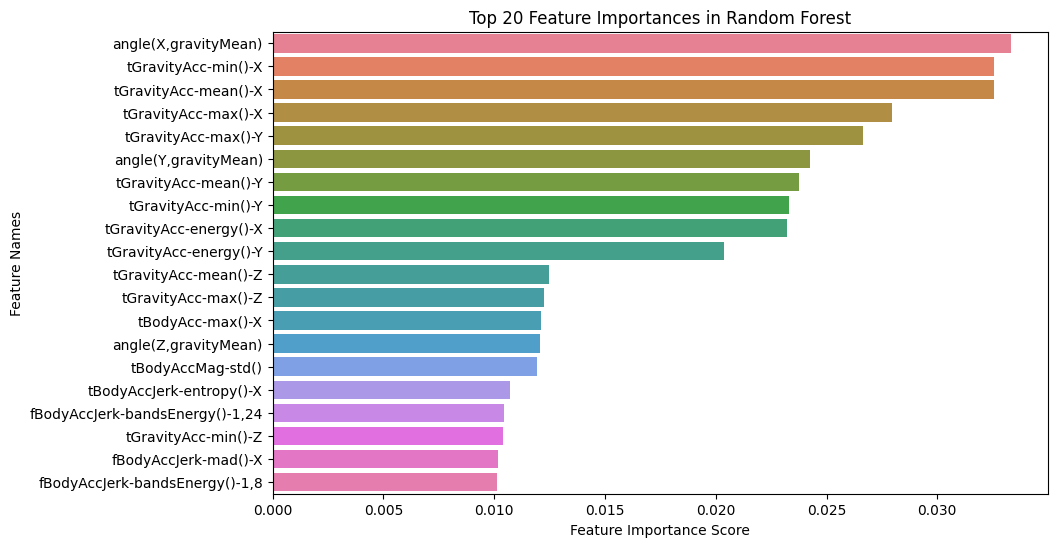

In [30]:
import seaborn as sns

# 막대그래프로 중요 특성 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=top20_cols.values, y=top20_cols.index, hue=top20_cols.index)
plt.title("Top 20 Feature Importances in Random Forest")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Names")
plt.show()

In [31]:
top20_cols.index

Index(['angle(X,gravityMean)', 'tGravityAcc-min()-X', 'tGravityAcc-mean()-X',
       'tGravityAcc-max()-X', 'tGravityAcc-max()-Y', 'angle(Y,gravityMean)',
       'tGravityAcc-mean()-Y', 'tGravityAcc-min()-Y', 'tGravityAcc-energy()-X',
       'tGravityAcc-energy()-Y', 'tGravityAcc-mean()-Z', 'tGravityAcc-max()-Z',
       'tBodyAcc-max()-X', 'angle(Z,gravityMean)', 'tBodyAccMag-std()',
       'tBodyAccJerk-entropy()-X', 'fBodyAccJerk-bandsEnergy()-1,24',
       'tGravityAcc-min()-Z', 'fBodyAccJerk-mad()-X',
       'fBodyAccJerk-bandsEnergy()-1,8'],
      dtype='object', name='column_name')

In [32]:
X_train_re = X_train[top20_cols.index]  # 중요 특성만 추출한 훈련 세트
X_test_re = X_test[top20_cols.index]    # 중요 특성만 추출한 테스트 세트

In [34]:
rf_clf_best_re = grid_cv.best_estimator_  # 최적 하이퍼파라미터로 학습된 모델
rf_clf_best_re.fit(X_train_re, y_train)  # 중요 특성만 추출한 훈련 세트로 학습

pred_re = rf_clf_best_re.predict(X_test_re)  # 중요 특성만 추출한 테스트 세트로 예측

accuracy_score(y_test, pred_re)

/home/jm/venv/opencv/lib/python3.12/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8055649813369529

561개의 특성보다 20개의 특성만 보면 연산속도가 정말 빠를 것이다. 비록 acc는 포기하더라도